

1.  S20170010105 - PSVN Bhavani Shankar
2.  S20170020230 - Pavan Kumar Anand

1.  S20170010138 - Hemanth Sanisetty

1.  S20170020241 - Somana Venkata Sai Krishna Rupesh










In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K

In [ ]:
data = pd.read_excel('./Dataset/AirQualityUCI.xlsx')

attributes = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
              'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

X_data = data[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
               'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'RH']]

Y_data = data[['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']]

# Data Available

Y_cols = ['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']

for i in range(5):
	count = 0
	for j in range(len(data[Y_cols[i]])):
		if data[Y_cols[i]][j] == -200:
			count += 1
	print(count/len(data[Y_cols[i]]))

# Model 1

model_1_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
               'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'RH']
X_1_data = X_data[model_1_cols]
Y_1_data = Y_data[['CO(GT)']]

# Handling missing values

imp_mean = SimpleImputer(missing_values=-200, strategy='mean')
imp_mean.fit(Y_1_data)

Y_1_data = imp_mean.transform(Y_1_data)



# Train test split

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1_data, Y_1_data, test_size=0.1, random_state=42)

scaler_1 = StandardScaler()
scaler_1.fit(X_1_train)
X_1_train = scaler_1.transform(X_1_train)
X_1_test = scaler_1.transform(X_1_test)


model = Sequential()
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
history = model.fit(X_1_train,Y_1_train,validation_data = (X_1_test,Y_1_test),batch_size = 32, epochs = 30)

0.17986534145559474
0.9023191193758683
0.0391151009939083
0.17516297958747462
0.1754835951693919
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_69 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_70 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 65        
Total params: 9,545
Trainable params: 9,545
Non-trainable params: 0
_________________________________________________________________
None
Train on 8421 samples, validate on 936 samples
Epoch 1/30
8421/8421 [==============================] - 2s 235us/step - loss: 1.1233 - val_loss: 0.5621
Epoch 2/30
8421/842

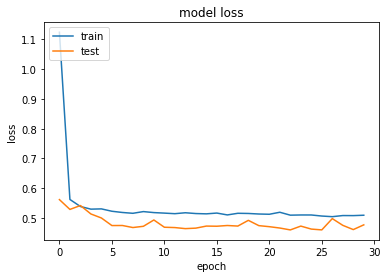

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(Y_1_train,model.predict(X_1_train)))
print(r2_score(Y_1_test,model.predict(X_1_test)))

0.6982638875361704
0.7448845076612003


In [ ]:
model_2_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
               'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'RH']
X_2_data = X_data[model_2_cols]
Y_2_data = Y_data[['NOx(GT)']]

# Handling missing values

imp_mean = SimpleImputer(missing_values=-200, strategy='mean')
imp_mean.fit(Y_2_data)

Y_2_data = imp_mean.transform(Y_2_data)

# print(Y_data)


# Train test split

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2_data, Y_2_data, test_size=0.1, random_state=42)

scaler_2 = StandardScaler()
scaler_2.fit(X_2_train)
X_2_train = scaler_2.transform(X_2_train)
X_2_test = scaler_2.transform(X_2_test)


model = Sequential()
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
history = model.fit(X_2_train,Y_2_train,validation_data = (X_2_test,Y_2_test),batch_size = 32, epochs = 40)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_73 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_74 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 65        
Total params: 4,873
Trainable params: 4,873
Non-trainable params: 0
_________________________________________________________________
None
Train on 8421 samples, validate on 936 samples
Epoch 1/40
8421/8421 [==============================] - 2s 237us/step - loss: 54886.4657 - val_loss: 15700.5523
Epoch 2/40
8421/8421 [==============================] - 1s 81us/step - loss: 14969.3121 - val_loss: 12611.23

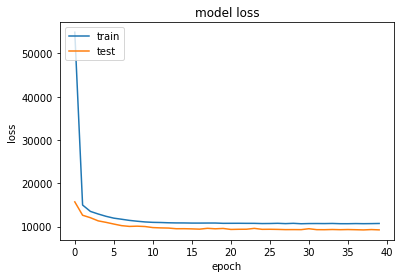

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(Y_2_train,model.predict(X_2_train)))
print(r2_score(Y_2_test,model.predict(X_2_test)))

0.7170088081192865
0.7480151369234438


In [ ]:
model_3_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
               'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'RH']
X_3_data = X_data[model_3_cols]
Y_3_data = Y_data[['NO2(GT)']]

# Handling missing values

imp_mean = SimpleImputer(missing_values=-200, strategy='mean')
imp_mean.fit(Y_3_data)

Y_3_data = imp_mean.transform(Y_3_data)

# print(Y_data)


# Train test split

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3_data, Y_3_data, test_size=0.1, random_state=42)

scaler_3 = StandardScaler()
scaler_3.fit(X_3_train)
X_3_train = scaler_3.transform(X_3_train)
X_3_test = scaler_3.transform(X_3_test)


model = Sequential()
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
history = model.fit(X_3_train,Y_3_train,validation_data = (X_3_test,Y_3_test),batch_size = 32, epochs = 20)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_77 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_78 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 65        
Total params: 4,873
Trainable params: 4,873
Non-trainable params: 0
_________________________________________________________________
None
Train on 8421 samples, validate on 936 samples
Epoch 1/20
8421/8421 [==============================] - 2s 288us/step - loss: 5944.2140 - val_loss: 1241.9915
Epoch 2/20
8421/8421 [==============================] - 1s 135us/step - loss: 967.2211 - val_loss: 828.2938
Ep

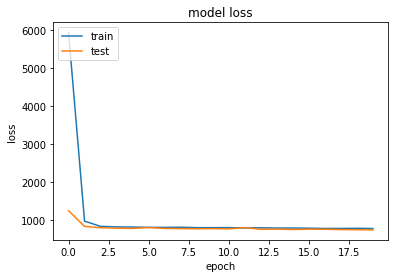

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(Y_3_train,model.predict(X_3_train)))
print(r2_score(Y_3_test,model.predict(X_3_test)))

0.6047720693129596
0.6165216426579758


In [ ]:
model_4_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
               'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'RH']

X_4_data = X_data[model_4_cols]
Y_4_data = Y_data[['C6H6(GT)']]

# Handling missing values

imp_mean = SimpleImputer(missing_values=-200, strategy='mean')
imp_mean.fit(Y_4_data)

Y_4_data = imp_mean.transform(Y_4_data)

# print(Y_data)


# Train test split

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4_data, Y_4_data, test_size=0.1, random_state=42)

scaler_3 = StandardScaler()
scaler_3.fit(X_4_train)
X_4_train = scaler_3.transform(X_4_train)
X_4_test = scaler_3.transform(X_4_test)


model = Sequential()
model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(64, kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())
history = model.fit(X_4_train,Y_4_train,validation_data = (X_4_test,Y_4_test),batch_size = 32, epochs = 20)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_81 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_82 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 65        
Total params: 4,873
Trainable params: 4,873
Non-trainable params: 0
_________________________________________________________________
None
Train on 8421 samples, validate on 936 samples
Epoch 1/20
8421/8421 [==============================] - 2s 252us/step - loss: 28.7434 - val_loss: 2.9259
Epoch 2/20
8421/8421 [==============================] - 1s 79us/step - loss: 1.9948 - val_loss: 1.2629
Epoch 3/20
8

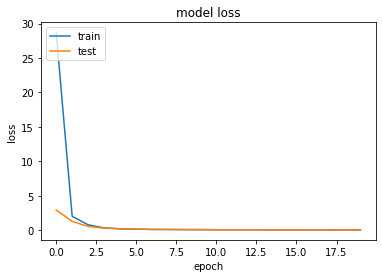

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(r2_score(Y_4_train,model.predict(X_4_train)))
print(r2_score(Y_4_test,model.predict(X_4_test)))

0.9995960365581775
0.9995639771893257
